In [18]:
# read the nutrition file

import pandas as pd


df  = pd.read_csv("nutrition_subset.csv");

df

,food item,weight_in_grams,saturated_fat,cholesterol
0,GELATIN; DRY 1 ENVELP,7.00,0.0,0
1,SEAWEED; SPIRULINA; DRIED 1 OZ,28.35,0.8,0
2,YEAST; BAKERS; DRY; ACTIVE 1 PKG,7.00,0.0,0
3,PARMESAN CHEESE; GRATED 1 OZ,28.35,5.4,22
4,PARMESAN CHEESE; GRATED 1 CUP,100.00,19.1,79
...,...,...,...,...
956,COFFEE; BREWED 6 FL OZ,180.00,0.0,0
957,TEA; BREWED 8 FL OZ,240.00,0.0,0
958,TEA; INSTANT;PREPRD;UNSWEETEND8 FL OZ,241.00,0.0,0
959,LETTUCE; BUTTERHEAD; RAW;LEAVE1 LEAF,15.00,0.0,0


In [19]:
# filter 5 highest food in saturate-fat
# A cheesecake had the most saturated-fat at 119.9. 
# Vanilla ice cream had the second highest at 118.2 for a 0.5 gallon ice cream. 
# Yellowcake with chocolate frosting was the third-highest at 92 in saturated fat for one cake. 
# The fourth-highest is cream pie at 90.1 saturated-fat for one pie. 
# Lard is the fifth-highest, at 80.4 for one cup. 

df.nlargest(5, ['saturated_fat'])


,food item,weight_in_grams,saturated_fat,cholesterol
378,CHEESECAKE 1 CAKE,1110.0,119.9,2053
535,ICE CREAM; VANLLA; RICH 16% FT1/2 GAL,1188.0,118.3,703
458,YELLOWCAKE W/ CHOCFRSTNG;COMML1 CAKE,1108.0,92.0,609
581,CREME PIE 1 PIE,910.0,90.1,46
890,LARD 1 CUP,205.0,80.4,195


In [45]:
# create a new variable to insert the new column as saturated_fat_per_gram to the DataFrame

per_gram=df.saturated_fat/df.weight_in_grams

df.insert(4,"saturated_fat_per_gram",per_gram)

df


,food item,weight_in_grams,saturated_fat,cholesterol,saturated_fat_per_gram
0,GELATIN; DRY 1 ENVELP,7.00,0.0,0,0.000000
1,SEAWEED; SPIRULINA; DRIED 1 OZ,28.35,0.8,0,0.028219
2,YEAST; BAKERS; DRY; ACTIVE 1 PKG,7.00,0.0,0,0.000000
3,PARMESAN CHEESE; GRATED 1 OZ,28.35,5.4,22,0.190476
4,PARMESAN CHEESE; GRATED 1 CUP,100.00,19.1,79,0.191000
...,...,...,...,...,...
956,COFFEE; BREWED 6 FL OZ,180.00,0.0,0,0.000000
957,TEA; BREWED 8 FL OZ,240.00,0.0,0,0.000000
958,TEA; INSTANT;PREPRD;UNSWEETEND8 FL OZ,241.00,0.0,0,0.000000
959,LETTUCE; BUTTERHEAD; RAW;LEAVE1 LEAF,15.00,0.0,0,0.000000


In [39]:
# find 5 highest saturated_fat per gram

df.nlargest(5, ['saturated_fat_per_gram'])

,food item,weight_in_grams,saturated_fat,cholesterol,saturated_fat_per_gram
908,BUTTER; SALTED 1 TBSP,14.0,7.1,31,0.507143
909,BUTTER; UNSALTED 1 TBSP,14.0,7.1,31,0.507143
709,BUTTER; SALTED 1/2 CUP,113.0,57.1,247,0.505310
710,BUTTER; UNSALTED 1/2 CUP,113.0,57.1,247,0.505310
912,BUTTER; SALTED 1 PAT,5.0,2.5,11,0.500000


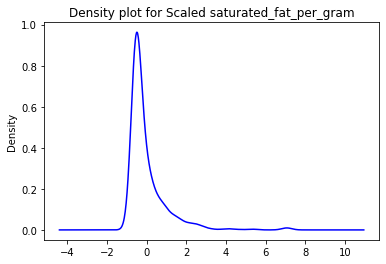

In [73]:


# Compute the z score of Compute the z score of  saturated_fat_per_gram value in the sample, 
#relative to the sample mean and standard deviation.

from scipy import stats
import matplotlib.pyplot as plt


df['saturated_fat_per_gram'] = stats.zscore(df.saturated_fat_per_gram, nan_policy='omit')

df.saturated_fat_per_gram.plot.density(color="blue")
plt.title('Density plot for Scaled saturated_fat_per_gram')
plt.show()


    



In [74]:
#  Recall standard-scaled column 'saturated_fat_per_gram'  
df['saturated_fat_per_gram'].describe()

count    9.610000e+02
mean    -5.175649e-17
std      1.000521e+00
min     -5.623352e-01
25%     -5.623352e-01
50%     -4.412993e-01
75%      1.539996e-01
max      7.110475e+00
Name: saturated_fat_per_gram, dtype: float64

In [77]:
# find  outlier at high end of scale
df_outliers_highEnd = df.query('( saturated_fat_per_gram > 3)')['saturated_fat_per_gram']

df_outliers_highEnd


210    4.240676
448    3.938687
492    4.204266
576    3.942889
709    7.082741
710    7.082741
890    5.371375
898    3.278227
899    5.373078
907    3.223726
908    7.110475
909    7.110475
912    7.002408
913    7.002408
920    4.732985
Name: saturated_fat_per_gram, dtype: float64

In [79]:
# find  outlier at low end of scale
df_outliers_lowEnd = df.query('( saturated_fat_per_gram < -3)')['saturated_fat_per_gram']

df_outliers_lowEnd

Series([], Name: saturated_fat_per_gram, dtype: float64)

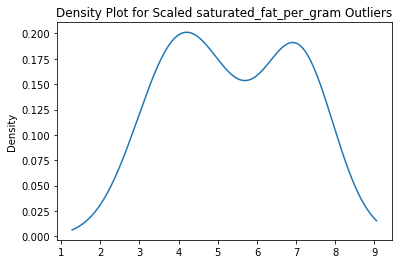

In [80]:
# show the density
df_outliers_highEnd.plot.density()
plt.title('Density Plot for Scaled saturated_fat_per_gram Outliers')
plt.show()


In [82]:
#  try mean to replace missing value

from sklearn.impute import SimpleImputer
import numpy as np


imputer = SimpleImputer(missing_values=0, strategy='mean')

df.saturated_fat_per_gram  = imputer.fit_transform(df['saturated_fat_per_gram'].values.reshape(-1,1))[:,0]

df.saturated_fat_per_gram 


0     -0.562335
1     -0.135401
2     -0.562335
3      2.319472
4      2.327397
         ...   
956   -0.562335
957   -0.562335
958   -0.562335
959   -0.562335
960   -0.562335
Name: saturated_fat_per_gram, Length: 961, dtype: float64

In [83]:
# show Standardize of weight_in_grams
from scipy import stats
import matplotlib.pyplot as plt


df['weight_in_grams'] = stats.zscore(df.weight_in_grams, nan_policy='omit')
df.weight_in_grams

0     -0.809983
1     -0.688550
2     -0.809983
3     -0.688550
4     -0.281026
         ...   
956    0.173991
957    0.515253
958    0.520941
959   -0.764481
960   -0.818514
Name: weight_in_grams, Length: 961, dtype: float64

In [84]:
# show Standardize of saturated_fat
df['saturated_fat'] = stats.zscore(df.saturated_fat, nan_policy='omit')
df.saturated_fat

0     -0.371329
1     -0.296833
2     -0.371329
3      0.131522
4      1.407274
         ...   
956   -0.371329
957   -0.371329
958   -0.371329
959   -0.371329
960   -0.371329
Name: saturated_fat, Length: 961, dtype: float64

In [85]:
# show Standardize of cholesterol
df['cholesterol'] = stats.zscore(df.cholesterol, nan_policy='omit')
df.cholesterol

0     -0.271510
1     -0.271510
2     -0.271510
3     -0.088021
4      0.387382
         ...   
956   -0.271510
957   -0.271510
958   -0.271510
959   -0.271510
960   -0.271510
Name: cholesterol, Length: 961, dtype: float64

In [86]:
# show Standardize of saturated_fat_per_gram
df['saturated_fat_per_gram'] = stats.zscore(df.saturated_fat_per_gram, nan_policy='omit')
df.saturated_fat_per_gram

0     -0.562335
1     -0.135401
2     -0.562335
3      2.319472
4      2.327397
         ...   
956   -0.562335
957   -0.562335
958   -0.562335
959   -0.562335
960   -0.562335
Name: saturated_fat_per_gram, Length: 961, dtype: float64